In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

# Draw inline
%matplotlib inline

path = '/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv'

In [2]:
%%bash
file -I "/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv"


/Users/Kevin/Desktop/DataKind/womens-health-project/data/current/DWWC Bookings-2017-03-07-Add-Age.csv: text/plain; charset=us-ascii


In [3]:
df=pd.read_csv(path, encoding='ascii')

In [4]:
df.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age
0,4420,03/02/2017,04/01/1995,phone,0,1,0,No,Coolock,Mirena / Jaydess Consultation,NaN,09/02/2017,Evening,0,0,1,22.083504
1,4419,03/02/2017,26/03/1992,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,11/02/2017,"Morning,Afternoon,Evening",1,1,1,24.859685
2,4418,03/02/2017,09/01/1987,e-mail,1,0,0,No,Liffey Street,Pregnancy Testing,NaN,07/02/2017,Afternoon,0,1,0,30.069815
3,4417,03/02/2017,NaN,phone,0,1,0,Yes,Pembroke Road,Cervical Smear Test,unchecked,06/02/2017,Afternoon,0,1,0,NaN
4,4416,03/02/2017,01/12/1994,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,03/02/2017,"Morning,Afternoon,Evening",1,1,1,22.176591


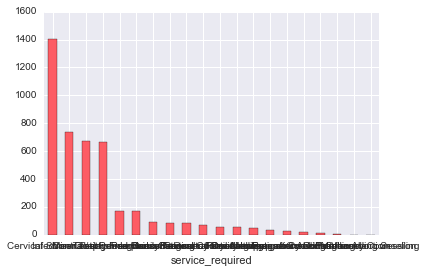

In [5]:
df.service_required.value_counts(dropna=False).plot(kind='bar', color='#FD5C64', rot=0)
plt.xlabel('service_required')
sns.despine()

In [6]:
df2 = df[df['preferred_time_morning'] == 1]
df2['Time of Day'] = 'Morning'


/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
df3 = df[df['preferred_time_afternoon'] == 1]
df3['Time of Day'] = 'Afternoon'

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
df4 = df[df['preferred_time_evening'] == 1]
df4['Time of Day'] = 'Evening'

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [9]:
df5 = df2.append(df3).append(df4)

In [10]:
df5.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age,Time of Day
1,4419,03/02/2017,26/03/1992,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,11/02/2017,"Morning,Afternoon,Evening",1,1,1,24.859685,Morning
4,4416,03/02/2017,01/12/1994,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,03/02/2017,"Morning,Afternoon,Evening",1,1,1,22.176591,Morning
6,4414,02/02/2017,05/05/1987,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,04/02/2017,Morning,1,0,0,29.749487,Morning
9,4411,02/02/2017,05/05/1987,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,04/02/2017,Morning,1,0,0,29.749487,Morning
10,4410,02/02/2017,23/04/1991,e-mail,1,0,0,No,Pembroke Road,Cervical Smear Test,checked,11/02/2017,"Morning,Afternoon",1,1,0,25.782341,Morning


In [11]:
df5.dtypes



ID                            int64
date_submitted               object
date_of_birth                object
preferred_contact            object
preferred_contact_e-mail      int64
preferred_contact_phone       int64
preferred_contact_text        int64
return_patient               object
choose_clinic                object
service_required             object
smear_test_calc_flag         object
preferred_appt_date          object
preferred_time_of_day        object
preferred_time_morning        int64
preferred_time_afternoon      int64
preferred_time_evening        int64
age                         float64
Time of Day                  object
dtype: object

In [12]:
# convert objects to pandas datetime data types
df5['date_submitted'] =  pd.to_datetime(df5['date_submitted'], format='%d/%m/%Y')

# convert objects to pandas datetime data types, and handle null values using coerce
df5['date_of_birth'] =  pd.to_datetime(df5['date_of_birth'], format='%d/%m/%Y',errors='coerce')

# convert objects to pandas datetime data types, and handle null values using coerce
df5['preferred_appt_date'] =  pd.to_datetime(df5['preferred_appt_date'], format='%d/%m/%Y',errors='coerce')

In [13]:
df5.dtypes


ID                                   int64
date_submitted              datetime64[ns]
date_of_birth               datetime64[ns]
preferred_contact                   object
preferred_contact_e-mail             int64
preferred_contact_phone              int64
preferred_contact_text               int64
return_patient                      object
choose_clinic                       object
service_required                    object
smear_test_calc_flag                object
preferred_appt_date         datetime64[ns]
preferred_time_of_day               object
preferred_time_morning               int64
preferred_time_afternoon             int64
preferred_time_evening               int64
age                                float64
Time of Day                         object
dtype: object

In [14]:
df5['preferred_appt_day_week'] = df5['preferred_appt_date'].dt.weekday_name

In [15]:
# df5(len(df5['preferred_appt_date']) >= 5)
df5['preferred_appt_date'].head(10)


1    2017-02-11
4    2017-02-03
6    2017-02-04
9    2017-02-04
10   2017-02-11
13   2017-02-03
14   2017-02-09
16          NaT
18   2017-02-18
19   2017-02-08
Name: preferred_appt_date, dtype: datetime64[ns]

In [16]:
df5 = df5[pd.notnull(df5['preferred_appt_date'])]
df5.head()

,ID,date_submitted,date_of_birth,preferred_contact,preferred_contact_e-mail,preferred_contact_phone,preferred_contact_text,return_patient,choose_clinic,service_required,smear_test_calc_flag,preferred_appt_date,preferred_time_of_day,preferred_time_morning,preferred_time_afternoon,preferred_time_evening,age,Time of Day,preferred_appt_day_week
1,4419,2017-02-03,1992-03-26,e-mail,1,0,0,No,Liffey Street,General Counselling,NaN,2017-02-11,"Morning,Afternoon,Evening",1,1,1,24.859685,Morning,Saturday
4,4416,2017-02-03,1994-12-01,"phone,e-mail",1,1,0,No,Liffey Street,Contraception services,NaN,2017-02-03,"Morning,Afternoon,Evening",1,1,1,22.176591,Morning,Friday
6,4414,2017-02-02,1987-05-05,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,2017-02-04,Morning,1,0,0,29.749487,Morning,Saturday
9,4411,2017-02-02,1987-05-05,e-mail,1,0,0,No,Liffey Street,Infection Testing,NaN,2017-02-04,Morning,1,0,0,29.749487,Morning,Saturday
10,4410,2017-02-02,1991-04-23,e-mail,1,0,0,No,Pembroke Road,Cervical Smear Test,checked,2017-02-11,"Morning,Afternoon",1,1,0,25.782341,Morning,Saturday


In [20]:
df_service_time = df5[['service_required', 'Time of Day', 'preferred_appt_day_week']]

df_service_time['Time_and_Day'] = df_service_time['Time of Day'] +' - '+ df_service_time['preferred_appt_day_week']

df_service_time.head()

#df_service_time_count = df_service_time.groupby(['service_required', 'Time of Day', 'preferred_appt_day_week']).size()


#df_service_time['count'] = df_service_time.groupby(['service_required', 'Time of Day', 'preferred_appt_day_week']).count()

/Users/Kevin/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,service_required,Time of Day,preferred_appt_day_week,Time_and_Day
1,General Counselling,Morning,Saturday,Morning - Saturday
4,Contraception services,Morning,Friday,Morning - Friday
6,Infection Testing,Morning,Saturday,Morning - Saturday
9,Infection Testing,Morning,Saturday,Morning - Saturday
10,Cervical Smear Test,Morning,Saturday,Morning - Saturday


In [26]:
df_service_time.groupby(['service_required', 'Time_and_Day']).count()

# df_service_time.groupby(['service_required', 'Time_and_Day']).

Time of Day  \
service_required       Time_and_Day                         
Cervical Smear Test    Afternoon - Friday              72   
                       Afternoon - Monday              77   
                       Afternoon - Saturday           113   
                       Afternoon - Sunday               5   
                       Afternoon - Thursday            51   
                       Afternoon - Tuesday             65   
                       Afternoon - Wednesday           53   
                       Evening - Friday                67   
                       Evening - Monday                91   
                       Evening - Saturday              26   
                       Evening - Sunday                 6   
                       Evening - Thursday              82   
                       Evening - Tuesday               87   
                       Evening - Wednesday             84   
                       Morning - Friday                73   
                       Morning - Monday                88   
                       Morning - Saturday             152   
                       Morning - Sunday                 2   
                       Morning - Thursday              63   
                       Morning - Tuesday               65   
                       Morning - Wednesday             66   
Contraception services Afternoon - Friday              48   
                       Afternoon - Monday              44   
                       Afternoon - Saturday            64   
                       Afternoon - Sunday               3   
                       Afternoon - Thursday            39   
                       Afternoon - Tuesday             42   
                       Afternoon - Wednesday           37   
                       Evening - Friday                36   
                       Evening - Monday                62   
...                                                   ...   
Pregnancy Counselling  Evening - Friday                 1   
                       Evening - Monday                 1   
                       Evening - Saturday               1   
                       Evening - Thursday               1   
                       Evening - Tuesday                7   
                       Evening - Wednesday              2   
                       Morning - Monday                 1   
                       Morning - Saturday               2   
                       Morning - Sunday                 1   
                       Morning - Tuesday                5   
                       Morning - Wednesday              1   
Pregnancy Testing      Afternoon - Friday               4   
                       Afternoon - Monday               6   
                       Afternoon - Saturday             6   
                       Afternoon - Sunday               1   
                       Afternoon - Thursday             4   
                       Afternoon - Tuesday              6   
                       Afternoon - Wednesday           10   
                       Evening - Friday                 3   
                       Evening - Monday                 5   
                       Evening - Saturday               3   
                       Evening - Thursday               6   
                       Evening - Tuesday                4   
                       Evening - Wednesday              7   
                       Morning - Friday                 7   
                       Morning - Monday                 6   
                       Morning - Saturday               6   
                       Morning - Thursday               4   
                       Morning - Tuesday                8   
                       Morning - Wednesday              2   

                                              preferred_appt_day_week  
service_required       Time_and_Day                                    
Cervical Smear Test    Afternoon - Friday                 

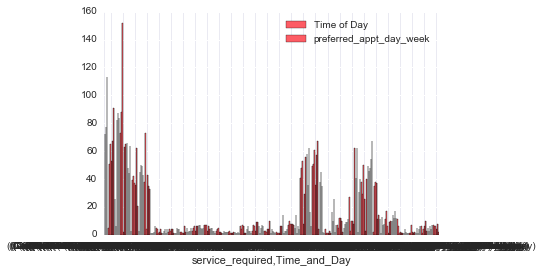

In [22]:
df_service_time.groupby(['service_required', 'Time_and_Day']).count().plot(kind='bar', color='#FD5C64', rot=0)


In [29]:
df_service_time_2 = df_service_time.groupby(['service_required', 'Time_and_Day'], as_index=False).count()
df_service_time_2.head()

,service_required,Time_and_Day,Time of Day,preferred_appt_day_week
0,Cervical Smear Test,Afternoon - Friday,72,72
1,Cervical Smear Test,Afternoon - Monday,77,77
2,Cervical Smear Test,Afternoon - Saturday,113,113
3,Cervical Smear Test,Afternoon - Sunday,5,5
4,Cervical Smear Test,Afternoon - Thursday,51,51


In [36]:
df_service_time_2 = df_service_time_2.drop('preferred_appt_day_week',  axis=1)

In [37]:
df_service_time_2.rename(columns={'Time of Day': 'Count'}, inplace=True)

In [38]:
df_service_time_2.head()

,service_required,Time_and_Day,Count
0,Cervical Smear Test,Afternoon - Friday,72
1,Cervical Smear Test,Afternoon - Monday,77
2,Cervical Smear Test,Afternoon - Saturday,113
3,Cervical Smear Test,Afternoon - Sunday,5
4,Cervical Smear Test,Afternoon - Thursday,51


In [39]:
df_service_time_3 = df_service_time_2.set_index('service_required').T


In [40]:
df_service_time_3.head()

service_required,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,Cervical Smear Test,...,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing,Pregnancy Testing
Time_and_Day,Afternoon - Friday,Afternoon - Monday,Afternoon - Saturday,Afternoon - Sunday,Afternoon - Thursday,Afternoon - Tuesday,Afternoon - Wednesday,Evening - Friday,Evening - Monday,Evening - Saturday,...,Evening - Saturday,Evening - Thursday,Evening - Tuesday,Evening - Wednesday,Morning - Friday,Morning - Monday,Morning - Saturday,Morning - Thursday,Morning - Tuesday,Morning - Wednesday
Count,72,77,113,5,51,65,53,67,91,26,...,3,6,4,7,7,6,6,4,8,2


In [41]:
df_service_time_4 = df_service_time_2.pivot_table('Count', index='Time_and_Day',columns='service_required', aggfunc=sum)


In [45]:
df_service_time_4

service_required,Cervical Smear Test,Contraception services,Counselling Session,Crisis Pregnancy Counselling,Cryotherapy,Fertility Investigations,Free Crisis Pregnancy Counselling,Free check-up after Abortion,Free counselling after Abortion,General Consultation,General Counselling,HPV Vaccine,Implanon Consultation,Infection Testing,Menopause Consultation,Mirena / Jaydess Consultation,Other,Period Problems,Pregnancy Counselling,Pregnancy Testing
Time_and_Day,,,,,,,,,,,,,,,,,,,,
Afternoon - Friday,72.0,48.0,NaN,NaN,6.0,1.0,6.0,3.0,1.0,2.0,3.0,3.0,6.0,41.0,NaN,16.0,62.0,11.0,1.0,4.0
Afternoon - Monday,77.0,44.0,NaN,2.0,5.0,1.0,3.0,1.0,1.0,1.0,9.0,2.0,6.0,48.0,2.0,10.0,41.0,14.0,2.0,6.0
Afternoon - Saturday,113.0,64.0,1.0,NaN,4.0,1.0,6.0,3.0,NaN,6.0,9.0,NaN,14.0,53.0,NaN,26.0,62.0,11.0,1.0,6.0
Afternoon - Sunday,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,2.0,2.0,1.0,1.0,1.0
Afternoon - Thursday,51.0,39.0,NaN,NaN,1.0,5.0,6.0,NaN,NaN,4.0,6.0,NaN,1.0,29.0,NaN,7.0,31.0,13.0,1.0,4.0
Afternoon - Tuesday,65.0,42.0,NaN,NaN,2.0,4.0,7.0,4.0,1.0,7.0,NaN,NaN,3.0,56.0,NaN,7.0,40.0,7.0,4.0,6.0
Afternoon - Wednesday,53.0,37.0,NaN,NaN,4.0,4.0,7.0,5.0,NaN,6.0,1.0,NaN,3.0,58.0,1.0,5.0,38.0,8.0,2.0,10.0
Evening - Friday,67.0,36.0,NaN,NaN,1.0,2.0,5.0,2.0,NaN,1.0,5.0,1.0,4.0,36.0,4.0,12.0,29.0,11.0,1.0,3.0
Evening - Monday,91.0,62.0,NaN,NaN,1.0,2.0,4.0,2.0,NaN,NaN,7.0,NaN,7.0,62.0,NaN,12.0,50.0,17.0,1.0,5.0


In [ ]:
service_pic = df_service_time_4.plot(kind='bar', subplots=True, figsize=(100,100), grid=True, title='Number of Requests')


#plt.show()
#plt.savefig('service_over_time.png')

In [64]:
# fig1.savefig('tessstttyyy.png', dpi=100)
# service_pic.savefig('service_over_time.png')
# service_pic.s
plt.savefig('service_over_time.png')

In [58]:
1+1

2

In [63]:
service_pic

array([<matplotlib.axes._subplots.AxesSubplot object at 0x132e614e0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x12918e278>], dtype=object)